In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import boston_housing

In [3]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57026/57026 [==============================] - 0s 2us/step


In [4]:
train_data.shape

(404, 13)

In [5]:
test_data.shape

(102, 13)

In [8]:
train_data[0], train_labels[0]

(array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
         91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
         18.72   ]),
 15.2)

In [9]:
test_data[0], test_labels[0] #cena mieszkania w tys. dolarow

(array([ 18.0846,   0.    ,  18.1   ,   0.    ,   0.679 ,   6.434 ,
        100.    ,   1.8347,  24.    , 666.    ,  20.2   ,  27.25  ,
         29.05  ]),
 7.2)

In [58]:
#normalizacja danych 

mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data = train_data - mean
train_data = train_data / std

In [61]:
mean = test_data.mean(axis=0)
std = test_data.std(axis=0)

test_data = test_data - mean
test_data = test_data / std

In [19]:
def build_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(13,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    model.compile(loss='mse', optimizer=tf.keras.optimizers.RMSprop(), metrics='mae')
    return model

In [27]:
#walidacja k-krzyzowa 
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate([
        train_data[:i * num_val_samples],
        train_data[(i+1) * num_val_samples:]
    ], axis=0)
    partial_train_labels = np.concatenate([
        train_labels[:i * num_val_samples],
        train_labels[(i+1) * num_val_samples:]
    ], axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_labels, epochs = num_epochs, batch_size = 1, verbose = 0, 
                       validation_data = (val_data, val_targets))

    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [29]:
all_mae_histories

[[3.6818065643310547,
  3.210188865661621,
  2.6572377681732178,
  2.4959025382995605,
  2.2896921634674072,
  2.2450449466705322,
  2.2844228744506836,
  2.252823829650879,
  2.3092973232269287,
  2.105069398880005,
  2.0034096240997314,
  2.3621666431427,
  1.9229742288589478,
  2.2525479793548584,
  2.535851240158081,
  2.9808013439178467,
  1.9973409175872803,
  2.1914591789245605,
  1.8369638919830322,
  1.8906341791152954,
  2.163639783859253,
  2.1818437576293945,
  1.8190959692001343,
  1.9240514039993286,
  1.9255306720733643,
  2.038799285888672,
  1.801213026046753,
  1.949166178703308,
  2.3374481201171875,
  2.1710140705108643,
  2.0710625648498535,
  2.167956590652466,
  2.1636250019073486,
  2.0597214698791504,
  1.7771751880645752,
  2.0633692741394043,
  1.8201982975006104,
  1.8788098096847534,
  2.536602735519409,
  1.7207934856414795,
  2.0093674659729004,
  1.9927923679351807,
  2.055218458175659,
  1.9348410367965698,
  1.8970880508422852,
  2.0558459758758545,
  

In [30]:
len(all_mae_histories)

4

In [31]:
len(all_mae_histories[0])

500

In [33]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

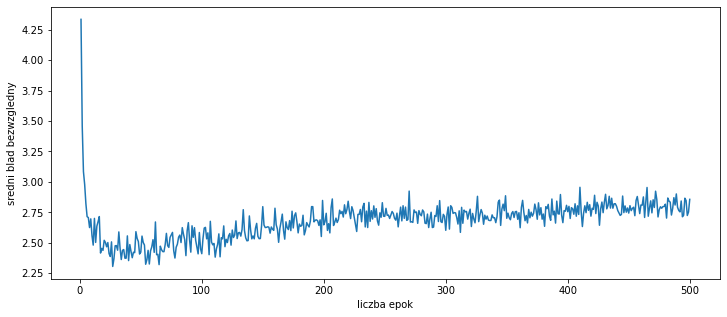

In [39]:
plt.figure(figsize=(12,5))
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('liczba epok')
plt.ylabel('sredni blad bezwzgledny')
plt.show()

In [40]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

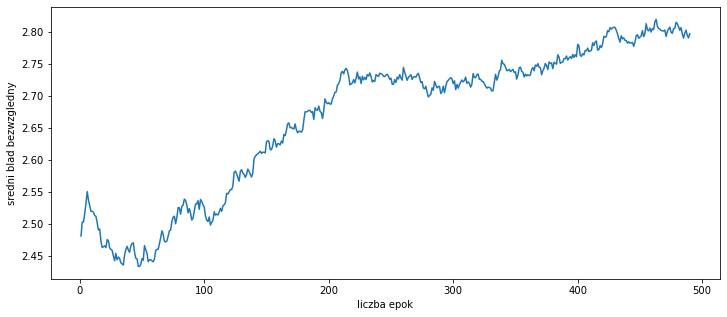

In [42]:
smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.figure(figsize=(12,5))
plt.plot(range(1, len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel('liczba epok')
plt.ylabel('sredni blad bezwzgledny')
plt.show()

In [43]:
#model przeucza sie po ok. 60 epoce
#trzeba dodac + 10 poniewaz tyle ucielismy do wykresu

In [72]:
model = build_model()
model.fit(train_data, train_labels, epochs = 80, batch_size = 16)

Epoch 1/80
26/26 [==============================] - 0s 1ms/step - loss: 499.3637 - mae: 20.4961
Epoch 2/80
26/26 [==============================] - 0s 944us/step - loss: 319.9940 - mae: 15.8249
Epoch 3/80
26/26 [==============================] - 0s 1ms/step - loss: 155.3617 - mae: 10.1518
Epoch 4/80
26/26 [==============================] - 0s 1ms/step - loss: 72.5128 - mae: 6.3946
Epoch 5/80
26/26 [==============================] - 0s 971us/step - loss: 44.3400 - mae: 4.9241
Epoch 6/80
26/26 [==============================] - 0s 1ms/step - loss: 32.5002 - mae: 4.0416
Epoch 7/80
26/26 [==============================] - 0s 1ms/step - loss: 26.3031 - mae: 3.6155
Epoch 8/80
26/26 [==============================] - 0s 1000us/step - loss: 22.2170 - mae: 3.3006
Epoch 9/80
26/26 [==============================] - 0s 1ms/step - loss: 19.7882 - mae: 3.1365
Epoch 10/80
26/26 [==============================] - 0s 1ms/step - loss: 17.8389 - mae: 2.9787
Epoch 11/80
26/26 [===========================

In [73]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 1ms/step - loss: 17.9729 - mae: 2.7449


[17.972854614257812, 2.744901180267334]

In [ ]:
###############################################################

In [121]:
def k_validation(model):
    k = 4
    num_val_samples = len(train_data) // k
    num_epochs = 300
    all_mae_histories = []

    for i in range(k):
        print('processing fold #', i)
        val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
        val_targets = train_labels[i * num_val_samples: (i+1) * num_val_samples]

        partial_train_data = np.concatenate([
            train_data[:i * num_val_samples],
            train_data[(i+1) * num_val_samples:]
        ], axis=0)
        partial_train_labels = np.concatenate([
            train_labels[:i * num_val_samples],
            train_labels[(i+1) * num_val_samples:]
        ], axis=0)

        history = model.fit(partial_train_data, partial_train_labels, epochs = num_epochs, batch_size = 16, verbose = 0, 
                           validation_data = (val_data, val_targets))

        mae_history = history.history['val_mae']
        all_mae_histories.append(mae_history)
        
    average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
    ]    
        
    smooth_mae_history = smooth_curve(average_mae_history[10:])

    plt.figure(figsize=(12,5))
    plt.plot(range(1, len(smooth_mae_history)+1), smooth_mae_history)
    plt.xlabel('liczba epok')
    plt.ylabel('sredni blad bezwzgledny')
    plt.show()

In [98]:
model2 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(13,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

model2.compile(loss='mse', optimizer=tf.keras.optimizers.RMSprop(), metrics='mae')

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


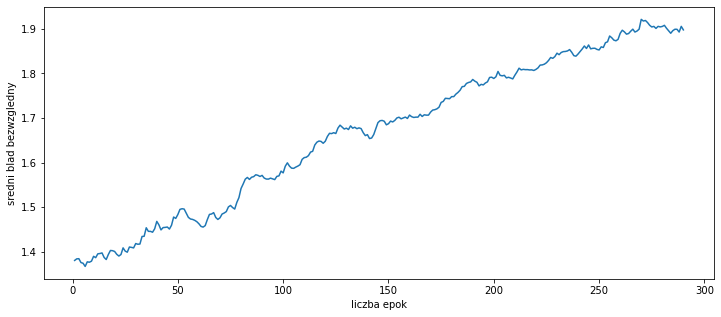

In [99]:
k_validation(model2)

In [100]:
model2.fit(train_data, train_labels, epochs = 20)

Epoch 1/20
13/13 [==============================] - 0s 1ms/step - loss: 1.1701 - mae: 0.6135
Epoch 2/20
13/13 [==============================] - 0s 1ms/step - loss: 0.9842 - mae: 0.5892
Epoch 3/20
13/13 [==============================] - 0s 1ms/step - loss: 0.8986 - mae: 0.5699
Epoch 4/20
13/13 [==============================] - 0s 1ms/step - loss: 0.7712 - mae: 0.5472
Epoch 5/20
13/13 [==============================] - 0s 1ms/step - loss: 0.6373 - mae: 0.5066
Epoch 6/20
13/13 [==============================] - 0s 1ms/step - loss: 0.6100 - mae: 0.5011
Epoch 7/20
13/13 [==============================] - 0s 1ms/step - loss: 0.5941 - mae: 0.5136
Epoch 8/20
13/13 [==============================] - 0s 1ms/step - loss: 0.5580 - mae: 0.4940
Epoch 9/20
13/13 [==============================] - 0s 1ms/step - loss: 0.4754 - mae: 0.4669
Epoch 10/20
13/13 [==============================] - 0s 1ms/step - loss: 0.4647 - mae: 0.4666
Epoch 11/20
13/13 [==============================] - 0s 1ms/step - lo

In [101]:
model2.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 15.8631 - mae: 2.8714


[15.863085746765137, 2.871401071548462]

In [118]:
model3 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(32, activation='relu', input_shape=(13,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

model3.compile(loss='mse', optimizer=tf.keras.optimizers.RMSprop(), metrics='mae')

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


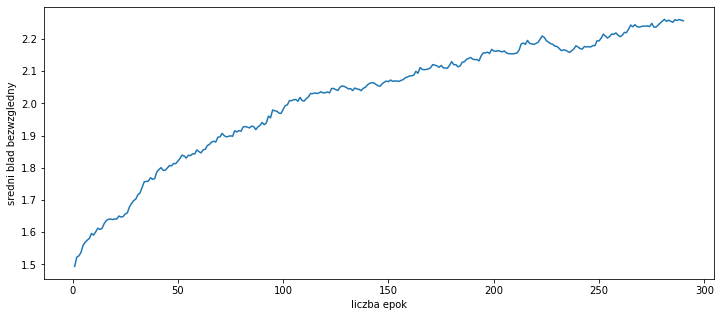

In [103]:
k_validation(model3)

In [119]:
model3.fit(train_data, train_labels, epochs = 5)

Epoch 1/5
13/13 [==============================] - 0s 1ms/step - loss: 562.7410 - mae: 21.8127
Epoch 2/5
13/13 [==============================] - 0s 1ms/step - loss: 522.3315 - mae: 20.9220
Epoch 3/5
13/13 [==============================] - 0s 1ms/step - loss: 479.1075 - mae: 19.9557
Epoch 4/5
13/13 [==============================] - 0s 1ms/step - loss: 428.6648 - mae: 18.8113
Epoch 5/5
13/13 [==============================] - 0s 1ms/step - loss: 375.8640 - mae: 17.4704


In [120]:
model3.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 5ms/step - loss: 369.4149 - mae: 17.3298


[369.4149475097656, 17.329822540283203]

In [117]:
model4 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(32, activation='relu', input_shape=(13,)),
        tf.keras.layers.Dense(1)
    ])

model4.compile(loss='mse', optimizer=tf.keras.optimizers.RMSprop(), metrics='mae')

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


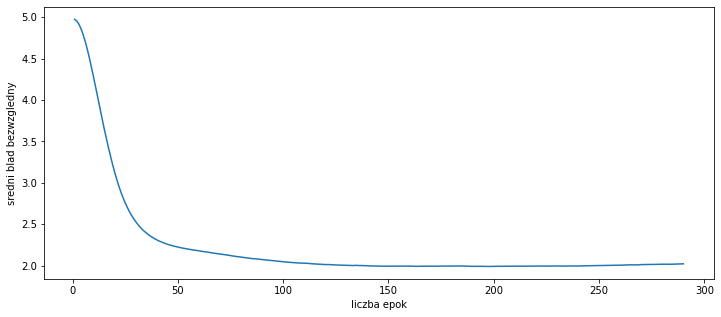

In [123]:
k_validation(model4)

In [129]:
model4.fit(train_data, train_labels, epochs = 150, batch_size = 16)

Epoch 1/150
26/26 [==============================] - 0s 1ms/step - loss: 3.2103 - mae: 1.2830
Epoch 2/150
26/26 [==============================] - 0s 960us/step - loss: 3.1907 - mae: 1.2590
Epoch 3/150
26/26 [==============================] - 0s 964us/step - loss: 3.2011 - mae: 1.2575
Epoch 4/150
26/26 [==============================] - 0s 1ms/step - loss: 3.2159 - mae: 1.2795
Epoch 5/150
26/26 [==============================] - 0s 969us/step - loss: 3.1633 - mae: 1.2654
Epoch 6/150
26/26 [==============================] - 0s 1ms/step - loss: 3.1851 - mae: 1.2680
Epoch 7/150
26/26 [==============================] - 0s 1ms/step - loss: 3.1980 - mae: 1.2702
Epoch 8/150
26/26 [==============================] - 0s 939us/step - loss: 3.1799 - mae: 1.2487
Epoch 9/150
26/26 [==============================] - 0s 985us/step - loss: 3.2109 - mae: 1.2766
Epoch 10/150
26/26 [==============================] - 0s 959us/step - loss: 3.1948 - mae: 1.2624
Epoch 11/150
26/26 [===========================

26/26 [==============================] - 0s 960us/step - loss: 3.1371 - mae: 1.2469
Epoch 87/150
26/26 [==============================] - 0s 920us/step - loss: 3.1108 - mae: 1.2510
Epoch 88/150
26/26 [==============================] - 0s 965us/step - loss: 3.1216 - mae: 1.2469
Epoch 89/150
26/26 [==============================] - 0s 966us/step - loss: 3.1169 - mae: 1.2463
Epoch 90/150
26/26 [==============================] - 0s 880us/step - loss: 3.0930 - mae: 1.2350
Epoch 91/150
26/26 [==============================] - 0s 1000us/step - loss: 3.1475 - mae: 1.2624
Epoch 92/150
26/26 [==============================] - 0s 920us/step - loss: 3.1404 - mae: 1.2601
Epoch 93/150
26/26 [==============================] - 0s 920us/step - loss: 3.0880 - mae: 1.2455
Epoch 94/150
26/26 [==============================] - 0s 960us/step - loss: 3.1082 - mae: 1.2379
Epoch 95/150
26/26 [==============================] - 0s 960us/step - loss: 3.0966 - mae: 1.2309
Epoch 96/150
26/26 [======================

In [130]:
model4.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 1ms/step - loss: 13.2378 - mae: 2.5684


[13.237801551818848, 2.568389892578125]

In [131]:
model5 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(16, activation='relu', input_shape=(13,)),
        tf.keras.layers.Dense(1)
    ])

model5.compile(loss='mse', optimizer=tf.keras.optimizers.RMSprop(), metrics='mae')

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


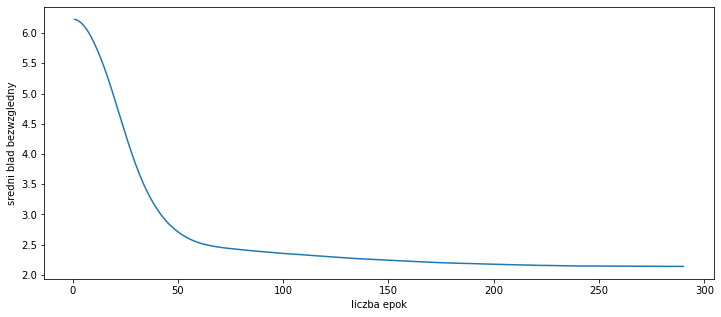

In [132]:
k_validation(model5)

In [157]:
model5.fit(train_data, train_labels, epochs = 100)

Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 4.6157 - mae: 1.5435
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 4.6435 - mae: 1.5510
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 4.6246 - mae: 1.5451
Epoch 4/100
13/13 [==============================] - 0s 924us/step - loss: 4.6196 - mae: 1.5482
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 4.6178 - mae: 1.5484
Epoch 6/100
13/13 [==============================] - 0s 1000us/step - loss: 4.6083 - mae: 1.5443
Epoch 7/100
13/13 [==============================] - 0s 969us/step - loss: 4.6332 - mae: 1.5434
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 4.6314 - mae: 1.5497
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 4.6197 - mae: 1.5477
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 4.6371 - mae: 1.5462
Epoch 11/100
13/13 [==============================] 

13/13 [==============================] - 0s 1ms/step - loss: 4.5787 - mae: 1.5358
Epoch 87/100
13/13 [==============================] - 0s 1ms/step - loss: 4.5962 - mae: 1.5427
Epoch 88/100
13/13 [==============================] - 0s 1ms/step - loss: 4.5991 - mae: 1.5464
Epoch 89/100
13/13 [==============================] - 0s 1000us/step - loss: 4.5928 - mae: 1.5454
Epoch 90/100
13/13 [==============================] - 0s 1ms/step - loss: 4.5887 - mae: 1.5486
Epoch 91/100
13/13 [==============================] - 0s 1ms/step - loss: 4.5871 - mae: 1.5400
Epoch 92/100
13/13 [==============================] - 0s 1ms/step - loss: 4.5765 - mae: 1.5434
Epoch 93/100
13/13 [==============================] - 0s 1ms/step - loss: 4.6102 - mae: 1.5459
Epoch 94/100
13/13 [==============================] - 0s 916us/step - loss: 4.6071 - mae: 1.5470
Epoch 95/100
13/13 [==============================] - 0s 1ms/step - loss: 4.5912 - mae: 1.5439
Epoch 96/100
13/13 [==============================] - 0s 1

In [158]:
model5.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 1000us/step - loss: 16.5891 - mae: 2.6722


[16.589061737060547, 2.6722233295440674]

In [141]:
model6 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(13,)),
        tf.keras.layers.Dense(1)
    ])

model6.compile(loss='mse', optimizer=tf.keras.optimizers.RMSprop(), metrics='mae')

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


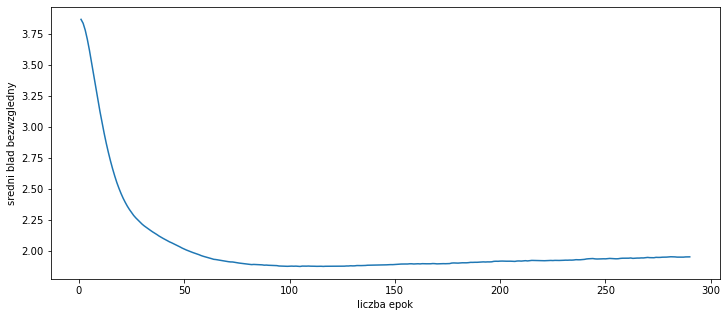

In [142]:
k_validation(model6)

In [149]:
model6.fit(train_data, train_labels, epochs = 30)

Epoch 1/30
13/13 [==============================] - 0s 1ms/step - loss: 2.6061 - mae: 1.1443
Epoch 2/30
13/13 [==============================] - 0s 1ms/step - loss: 2.5804 - mae: 1.1304
Epoch 3/30
13/13 [==============================] - 0s 1ms/step - loss: 2.5613 - mae: 1.1261
Epoch 4/30
13/13 [==============================] - 0s 1ms/step - loss: 2.5858 - mae: 1.1294
Epoch 5/30
13/13 [==============================] - 0s 1ms/step - loss: 2.5727 - mae: 1.1320
Epoch 6/30
13/13 [==============================] - 0s 1ms/step - loss: 2.5890 - mae: 1.1297
Epoch 7/30
13/13 [==============================] - 0s 1ms/step - loss: 2.5518 - mae: 1.1269
Epoch 8/30
13/13 [==============================] - 0s 1ms/step - loss: 2.5553 - mae: 1.1172
Epoch 9/30
13/13 [==============================] - 0s 1ms/step - loss: 2.5998 - mae: 1.1416
Epoch 10/30
13/13 [==============================] - 0s 1ms/step - loss: 2.6151 - mae: 1.1478
Epoch 11/30
13/13 [==============================] - 0s 1ms/step - lo

In [150]:
model6.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 1ms/step - loss: 12.8589 - mae: 2.5715


[12.858909606933594, 2.5714688301086426]

In [163]:
model7 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(13,)),
        tf.keras.layers.Dense(1)
    ])

model7.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(), metrics='mae')

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


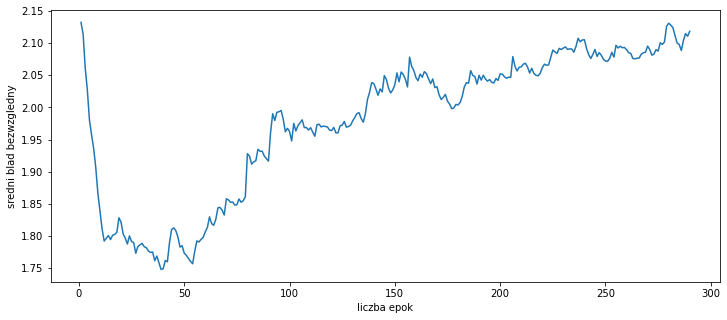

In [164]:
k_validation(model7)

In [177]:
model7.fit(train_data, train_labels, epochs = 30)

Epoch 1/30
13/13 [==============================] - 0s 1ms/step - loss: 0.8882 - mae: 0.7153
Epoch 2/30
13/13 [==============================] - 0s 1ms/step - loss: 0.9169 - mae: 0.7049
Epoch 3/30
13/13 [==============================] - 0s 1ms/step - loss: 0.9489 - mae: 0.7320
Epoch 4/30
13/13 [==============================] - 0s 1ms/step - loss: 1.2560 - mae: 0.8355
Epoch 5/30
13/13 [==============================] - 0s 1ms/step - loss: 1.2721 - mae: 0.8124
Epoch 6/30
13/13 [==============================] - 0s 1ms/step - loss: 2.1617 - mae: 1.0277
Epoch 7/30
13/13 [==============================] - 0s 997us/step - loss: 0.9632 - mae: 0.7186
Epoch 8/30
13/13 [==============================] - 0s 962us/step - loss: 0.8427 - mae: 0.6796
Epoch 9/30
13/13 [==============================] - 0s 1ms/step - loss: 0.9313 - mae: 0.7224
Epoch 10/30
13/13 [==============================] - 0s 1ms/step - loss: 0.7923 - mae: 0.6641
Epoch 11/30
13/13 [==============================] - 0s 1ms/step 

In [178]:
model7.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 1ms/step - loss: 16.5495 - mae: 3.0649


[16.549510955810547, 3.064892053604126]

In [206]:
model8 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(13,)),
        tf.keras.layers.Dense(1)
    ])

model8.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(), metrics='mae')

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


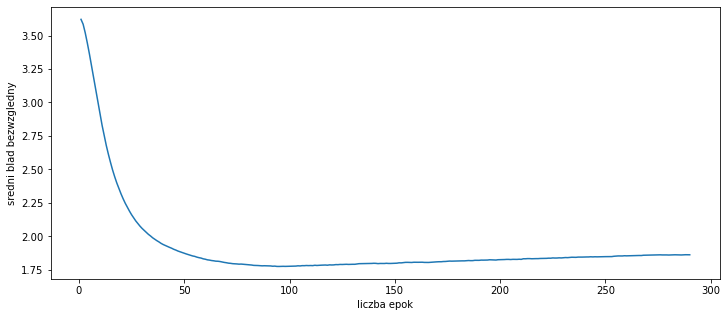

In [207]:
k_validation(model8)

In [212]:
model8.fit(train_data, train_labels, epochs = 80)

Epoch 1/80
13/13 [==============================] - 0s 1ms/step - loss: 1.1300 - mae: 1.1300
Epoch 2/80
13/13 [==============================] - 0s 1ms/step - loss: 1.1290 - mae: 1.1290
Epoch 3/80
13/13 [==============================] - 0s 1ms/step - loss: 1.1354 - mae: 1.1354
Epoch 4/80
13/13 [==============================] - 0s 1ms/step - loss: 1.1534 - mae: 1.1534
Epoch 5/80
13/13 [==============================] - 0s 1ms/step - loss: 1.1462 - mae: 1.1462
Epoch 6/80
13/13 [==============================] - 0s 1ms/step - loss: 1.1505 - mae: 1.1505
Epoch 7/80
13/13 [==============================] - 0s 1ms/step - loss: 1.1362 - mae: 1.1362
Epoch 8/80
13/13 [==============================] - 0s 1ms/step - loss: 1.1269 - mae: 1.1269
Epoch 9/80
13/13 [==============================] - 0s 1ms/step - loss: 1.1257 - mae: 1.1257
Epoch 10/80
13/13 [==============================] - 0s 1ms/step - loss: 1.1227 - mae: 1.1227
Epoch 11/80
13/13 [==============================] - 0s 1ms/step - lo

In [213]:
model8.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 1ms/step - loss: 2.4414 - mae: 2.4414


[2.441446542739868, 2.441446542739868]